In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install kiwipiepy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install Pillow --upgrade
!pip install numpy
!pip install xlrd
!pip install openpyxl
!pip install pandas
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
df_dic = pd.read_excel('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/합본.xlsx')
print(df_dic[:100])

     단어    클래스
0    일본  항일+민족
1    민족  항일+민족
2    조선  항일+민족
3    독립  항일+민족
4    사람  항일+민족
..  ...    ...
95  러시아  항일+민족
96   국가  항일+민족
97   문명  항일+민족
98   학교  항일+민족
99   인민  항일+민족

[100 rows x 2 columns]


In [4]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
wordList = df_dic.loc[:,["단어"]]
wordType = set()

wordsPOS = []
for i in range(0,len(wordList)):
    classWords = str(df_dic.loc[i,"클래스"])
    wordType.add(str(classWords))
    target = wordList.iloc[i,0]
    posTagout = kiwi.tokenize(target)
    # print(posTagout)
    wordPOS = ""
    for eachOut in posTagout:
        result = eachOut[0]+"/"+eachOut[1]
        wordPOS = result
        break
    wordPOS = wordPOS.strip()
    wordsPOS.append(wordPOS)
print(wordsPOS[:10])
print(wordType)

['일본/NNP', '민족/NNG', '조선/NNP', '독립/NNG', '사람/NNG', '세계/NNG', '나라/NNG', '일/NNG', '동포/NNG', '말/NNG']
{'국제주의+세계적', '항일+민족', '비폭력(비무장)+평화', '공화정 국가 수립 + 개혁적', '폭력(무장)'}


In [5]:
df_dic['품사태깅'] = wordsPOS
classWords = list(wordType)
print(df_dic[:100])
print(classWords)

     단어    클래스     품사태깅
0    일본  항일+민족   일본/NNP
1    민족  항일+민족   민족/NNG
2    조선  항일+민족   조선/NNP
3    독립  항일+민족   독립/NNG
4    사람  항일+민족   사람/NNG
..  ...    ...      ...
95  러시아  항일+민족  러시아/NNP
96   국가  항일+민족   국가/NNG
97   문명  항일+민족   문명/NNG
98   학교  항일+민족   학교/NNG
99   인민  항일+민족   인민/NNG

[100 rows x 3 columns]
['국제주의+세계적', '항일+민족', '비폭력(비무장)+평화', '공화정 국가 수립 + 개혁적', '폭력(무장)']


In [6]:
#감정들이 가지고 있는 단어 목록 확인하기
ontologyDic = {}
for eachClass in classWords:
    ontologyDic[eachClass] = list(df_dic[df_dic.클래스==eachClass]['품사태깅'])
    print(eachClass)
    print(list(df_dic[df_dic.클래스==eachClass]['품사태깅']))
print(ontologyDic)

국제주의+세계적
['지/EC', '출병/NNG', '이탈리아/NNP', '배포/NNG', '약소민족/NNG', '배신/NNG', '조화/NNG', '계승/NNG', '중간/NNG', '꼴/NNG', '전부/MAG', '추밀부/NNG', '종족/NNG', '한미/NNP', '비준/NNG', '인사/NNG', '병신/NNG', '언급/NNG', '인명/NNG', '간파/NNG', '빙자/NNG', '구석/NNG', '예정/NNG', '변천/NNG', '결의문/NNG', '대수/NNG', '전반/NNG', '벽력/NNG', '경탄/NNG', '편집인/NNG', '준수/NNG', '인격/NNG', '사망자/NNG', '일행/NNG', '경향/NNG', '법규/NNG', '함양/NNG', '연출/NNG', '파리/NNP', '신세계/NNP', '소멸/NNG', '남대문/NNP', '회의장/NNG', '소생/NNG', '신자/NNG', '기약/NNG', '모집/NNG', '모자/NNG', '지식인/NNG', '장악/NNG', '농부/NNG', '급박/NNG', '의정원/NNG', '공적/NNG', '징계/NNG', '모래/NNG', '의의/NNG', '유산/NNG', '태국/NNP', '노소/NNG', '회의소/NNG', '몰지각/NNG', '거액/NNG', '글자/NNG', '무식/NNG', '특/NNG', '실책/NNG', '실질/NNG', '조/NNP', '참/IC', '지능/NNG', '찬양/NNG', '자취/NNG', '기자단/NNG', '피로/NNG', '작년/NNG', '고을/NNG', '무궁화/NNG', '작위/NNG', '거류/NNG', '찬동/NNG', '혓바닥/NNG', '특별/NNG', '농촌/NNG', '공원/NNG', '제나라/NNP', '의안/NNG', '시/NNB', '융희/NNP', '수용/NNG', '망국/NNG', '하/VV', '수행/NNG', '내부/NNG', '기둥/NNG', '진보/NNG', '내란/NNG', '기름/NNG', '

In [7]:
#단어-감정 사전 만들기
wordOntologyDic = {}
for i in range(0,len(df_dic)):
    wordOntologyDic[df_dic.loc[i,"품사태깅"]] = df_dic.loc[i,"클래스"]
print(wordOntologyDic)

{'일본/NNP': '항일+민족', '민족/NNG': '항일+민족', '조선/NNP': '항일+민족', '독립/NNG': '항일+민족', '사람/NNG': '항일+민족', '세계/NNG': '항일+민족', '나라/NNG': '항일+민족', '일/NNG': '항일+민족', '동포/NNG': '항일+민족', '말/NNG': '항일+민족', '자유/NNG': '항일+민족', '일본인/NNG': '항일+민족', '평화/NNG': '항일+민족', '하늘/NNG': '항일+민족', '정부/NNG': '항일+민족', '마음/NNG': '항일+민족', '조선인/NNG': '항일+민족', '행동/NNG': '항일+민족', '국민/NNG': '항일+민족', '생각/NNG': '항일+민족', '한국/NNP': '항일+민족', '정의/NNG': '항일+민족', '때/NNG': '항일+민족', '가운데/NNG': '항일+민족', '만세/IC': '항일+민족', '피/NNG': '항일+민족', '회의/NNG': '항일+민족', '아래/NNG': '항일+민족', '역사/NNG': '항일+민족', '백성/NNG': '항일+민족', '동안/NNG': '항일+민족', '자신/NNG': '항일+민족', '정신/NNG': '항일+민족', '운동/NNG': '항일+민족', '앞/NNG': '항일+민족', '소리/NNG': '항일+민족', '미국/NNP': '항일+민족', '나/NP': '항일+민족', '원수/NNG': '항일+민족', '대표/NNG': '항일+민족', '시대/NNG': '항일+민족', '이번/NNG': '항일+민족', '과거/NNG': '항일+민족', '생명/NNG': '항일+민족', '이상/NNG': '항일+민족', '세상/NNG': '항일+민족', '전쟁/NNG': '항일+민족', '동양/NNG': '항일+민족', '선언/NNG': '항일+민족', '후/IC': '항일+민족', '힘/NNG': '항일+민족', '뜻/NNG': '항일+민족', '속/NNG': '항일+민족', '형

In [8]:
# 데이터 불러오기
import re

fileDir = "C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/text/일본시가현립대학도서정보센터(박경식문고).txt"
fr = open(fileDir, 'r', encoding='utf-8')
contents = fr.readlines()
fr.close()

reviewList = []
for content in contents:
    content = re.sub('[^가-힣]', ' ', content).replace("\n","")
    content = re.sub('[\s]+', ' ', content).strip()
    if content == "" or content == " ":
        pass
    else:
        reviewList.append(content)

for eachReview in reviewList:
    print(eachReview)

우리 이천만 동포 우리 사랑하는 우리 민족이여 결코 저 일본인들의 요망한 술책에 빠지지 말라 저들이 우리를 협박하기 위해 야만적인 행동을 하더라도 조금도 주저하지 말라 저들의 신문에 실린 유고 에서 한 말을 잘 따져보고 저들이 어떠한 술책을 쓰고 있는지를 잘 생각해 본 후 우리는 우리의 각성한 행동을 할지어다
저들은 유고에서 말하기를 조선과 일본은 친밀하고 이번 월 일과 월 일의 일은 외국에서 사는 조선 사람이 조선 안의 사정을 잘 알지 못해서 그런 것이며 교육기관도 년 만에 완전히 보급되었다고 하였다 하지만 이것은 겉모습일 뿐이고 저들의 속마음은 우리 사랑하는 이천만 동포를 저들에게 동화시키려는 것에 지나지 않는다
세계 여러 나라와 여러 민족들이 어떠한 상태에 있는지는 그 나라의 국민교육 즉 소학교가 어떠한가에 달려있다 그런데 조선의 소학교 교육을 보면 시종 일본이 어떠한 교육방침을 택하는가에 따라 결정된다 교장은 조선인이 아니고 거의 모두 일본인이며 기타 관청 등에도 조선인이 기관장을 맡는 일이 극히 드물다 도장관에서 군수와 면장에 이르기까지 모두 일본놈들을 임명하여 우리를 마치 야만인과도 같이 취급하고 있다 슬프도다 우리들은 어찌 이것을 가만히 두고만 볼 수 있단 말인가
주변의 여러 나라들의 마음이 우리를 보호하고 있는 지금 우리들은 몸을 바쳐 행동하여 독립의 깃발 아래 자유의 몸이 되어 봅시다 두 번 다시 돌아오지 아니할 이 기회를 놓쳐서는 아니 될 것이다
우리 이천만 동포 형제 자매여 우리 나라를 위하여 자신의 몸을 희생하시오 우리가 몇 천 년 몇 만 년을 살더라도 독립된 생활과 자유로운 행동을 할 수 없다면 그것은 저 돌멩이나 강과 바다와도 같을 것입니다 돌멩이와 강과 바다는 몇 만 년이 지나도 아무 재미가 없을 것이니 우리 독립의 깃발 아래에서 생활합시다
우리들은 어디까지나 우리가 먹은 마음가짐을 지키며 행동하고 저 일본인들의 간교한 술책에 빠지지 맙시다 이천만 동포여 모두 죽더라도 한번 나가봅시다 독립의 깃발이 우리를 기다리고 있습니다 눈물을 뿌

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
C:\Users\wjh20\AppData\Local\Temp\ipykernel_48736\1448318285.py:12: SyntaxWarning: invalid escape sequence '\s'
  content = re.sub('[\s]+', ' ', content).strip()


In [9]:
from kiwipiepy import Kiwi
import re

kiwi = Kiwi()
#품사태깅된 문장
reviewPOSList = []
#단어의 타입 확인
wordType = set()
sentencePOSAll = []
sentencePOSContent = []
sentencePOSTextAll = ""

MWEsList = open('C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/복합어 사전.txt', encoding='UTF-8').readlines()

for eachReview in reviewList:
    #띄어쓰기
    eachReviewSpace = kiwi.space(eachReview)
    #문장 분할
    eachReviewSpaceSentences = kiwi.split_into_sents(eachReviewSpace)
    for sentence in eachReviewSpaceSentences:
        content = sentence.text
        #품사태깅
        for i in range(0,len(MWEsList)):
            eachMWEs = MWEsList[i].replace("\n","").strip()
            content = content.replace(eachMWEs, eachMWEs.replace(" ","_"))
        posTagout = kiwi.tokenize(content)
        sentencePOS = ''
        for eachOut in posTagout:
            if "NN" in eachOut[1] :
                if "_" in eachOut[0]:
                    resultContent = eachOut[0]+"/MWEs"
                else:
                    resultContent = eachOut[0] + "/" + eachOut[1]
                sentencePOSContent.append(resultContent)
            if "_" in eachOut[0]:
                result = eachOut[0] + "/MWEs"
            else:
                result = eachOut[0] + "/" + eachOut[1]
            sentencePOS = sentencePOS + " " + result
            sentencePOSAll.append(result)
            if result != "":
                wordType.add(result)
            sentencePOSTextAll = sentencePOSTextAll + " " + eachOut[0]
        sentencePOS = sentencePOS.strip()
#         sentencePOSAll = sentencePOSAll + " " + sentencePOS
        reviewPOSList.append(sentencePOS)

sentencePOSTextAll = sentencePOSTextAll.strip()

print(sentencePOSContent[:20])
print(sentencePOSAll[:20])
print(wordType)
print(len(wordType))
print(reviewPOSList[:10])
print(len(reviewPOSList))

['동포/NNG', '사랑/NNG', '민족/NNG', '일본인/NNG', '요망/NNG', '술책/NNG', '협박/NNG', '야만/NNG', '행동/NNG', '조금/NNG', '주저/NNG', '신문/NNG', '유고/NNP', '말/NNG', '술책/NNG', '생각/NNG', '후/NNG', '각성/NNG', '행동/NNG', '유고/NNP']
['우리/NP', '이천만/NR', '동포/NNG', '우리/NP', '사랑/NNG', '하/XSV', '는/ETM', '우리/NP', '민족/NNG', '이/VCP', '여/EC', '결코/MAG', '저/MM', '일본인/NNG', '들/XSN', '의/JKG', '요망/NNG', '하/XSA', 'ᆫ/ETM', '술책/NNG']
{'가히/MAG', '이/NNP', '막/VV', '총재/NNG', '처자식/NNG', '당시/NNG', '개/NNB', '명령/NNG', '들어오/VV', '알/VV', '준비/NNG', '간사/NNG', '기관지/NNG', '금곡/NNP', '사명/NNG', '감/VV', '약속/NNG', '신사/NNG', '연안/NNG', '관세/NNG', '홍수/NNG', '당하/VV', '송병준/NNP', '어깨/NNG', '뻔하/VA', '정도/NNG', '관청/NNG', '타고나/VV', '바탕/NNG', '지참/NNG', '측면/NNG', '급료/NNG', '이며/JC', '환/NNB', 'ᆸ니다/EF', '회/NNG', '심지어/MAG', '송가/NNP', '중대/XR', '가/JX', '령/NNG', '귀화/NNG', '순진/XR', '고맙/VA-I', '따위/NNB', '원칙/NNG', '협박/NNG', '명의/NNG', '모조리/MAG', '나/NNG', '관/NNG', '이면/NNG', '끌어들이/VV', '놈/NNB', '토하/VV', '부령/NNG', '해마다/MAG', '수원/NNP', '도리/NNG', '인구/NNG', '붕/NNG', '한나라/NNP', '빼앗기/

<Axes: xlabel='n', ylabel='word'>

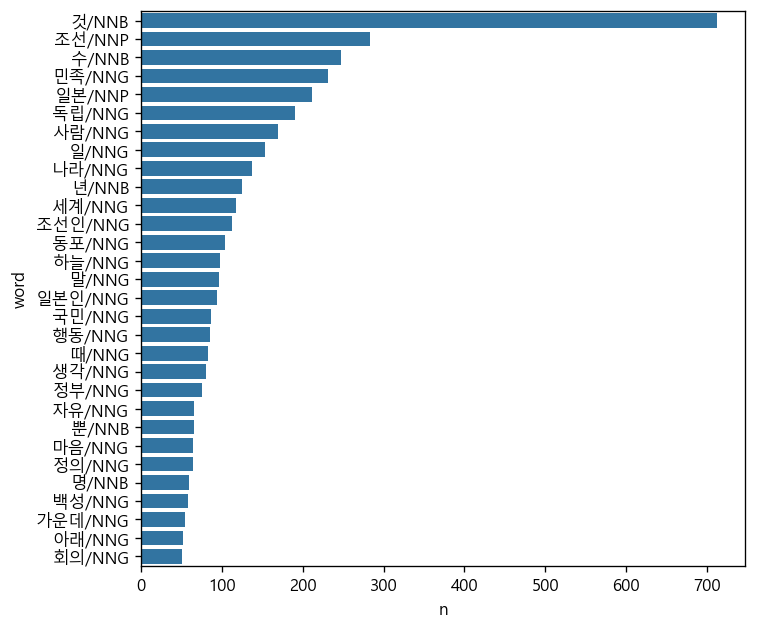

In [10]:
import pandas as pd
df_words = pd.DataFrame({'word':sentencePOSContent})

# 단어의 글자수 변수 추가하기
df_words['count'] = df_words['word'].str.len()

#글자수가 2이상인 단어들만 남기기
df_words = df_words.query('count >= 2')

#단어들의 등장 빈도수 확인하기
#단어 별로 분리하기
df_words = df_words.groupby('word', as_index = False)
#빈도 계산하기
df_words = df_words.agg(n=('word', 'count'))
#내림차수으로 정렬하기
df_words = df_words.sort_values('n', ascending = False)

top30 = df_words.head(30)

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})

sns.barplot(data = top30, y = 'word', x = 'n')

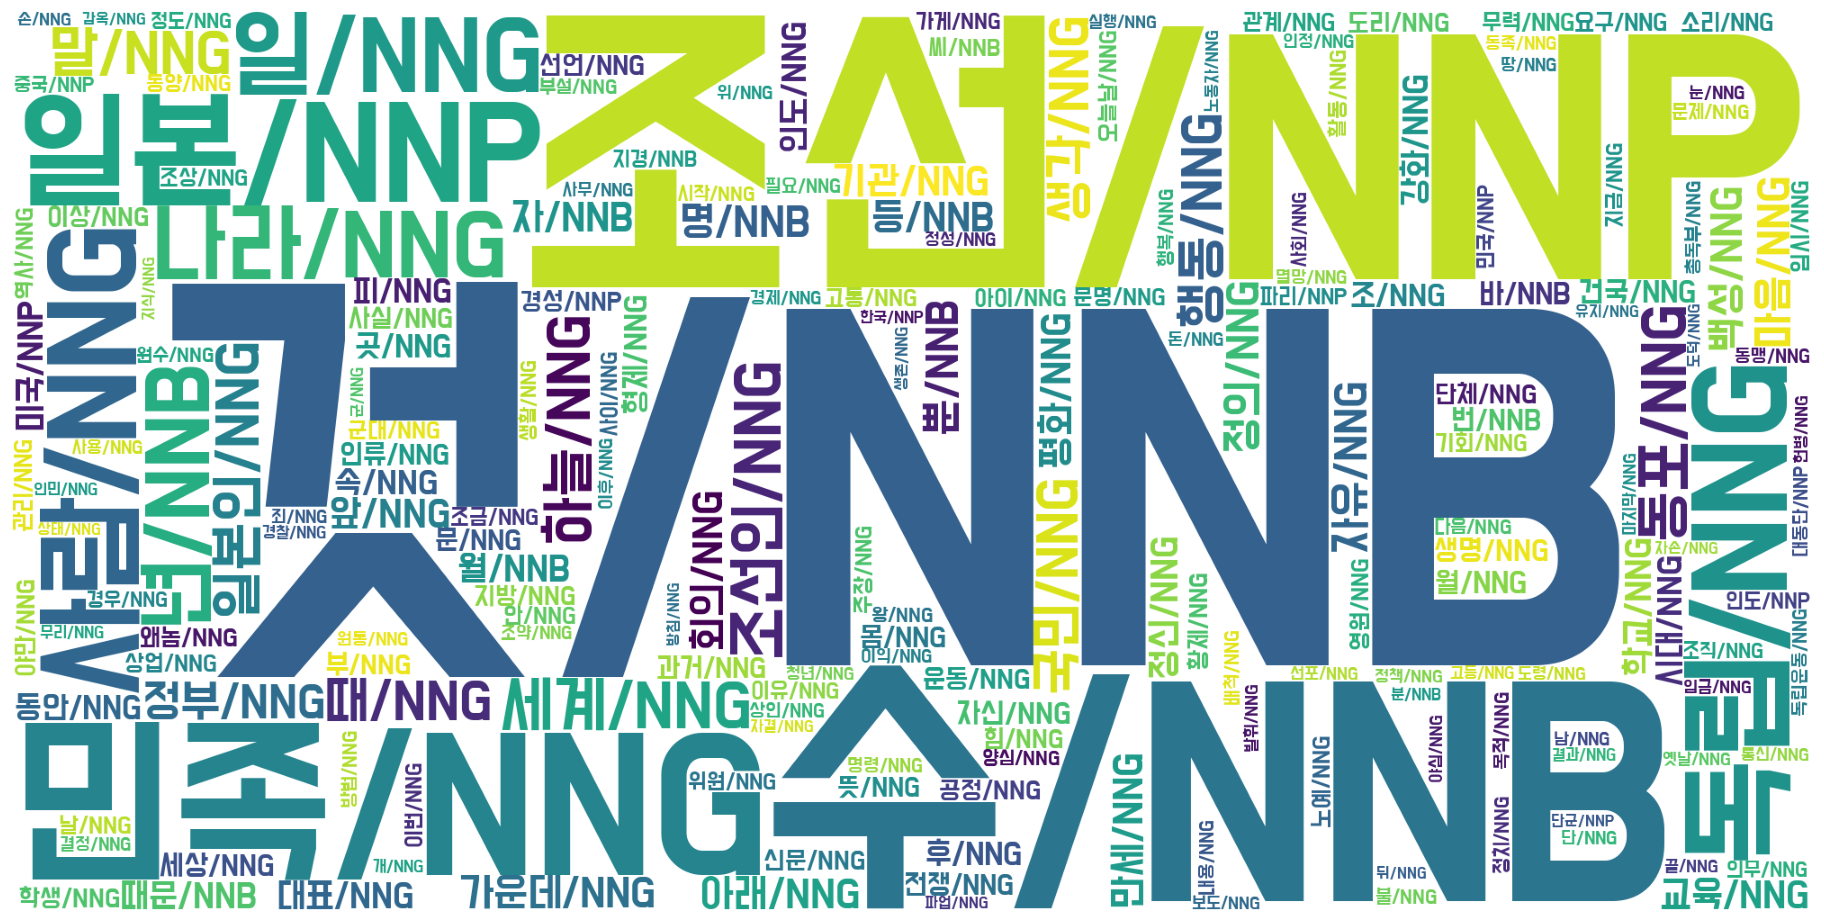

In [11]:
#현재의 데이터 딕셔너리로 변환하기
df_words_dic = df_words.set_index('word').to_dict()['n']

from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치
import numpy as np
import matplotlib.pyplot as plt

#font = '/Users/seongminmun/opt/anaconda3/pkgs/notebook-6.4.5-py39hecd8cb5_0/lib/python3.9/site-packages/notebook/static/components/MathJax/fonts/DoHyeon-Regular.ttf'
font = 'C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/DoHyeon-Regular.ttf'
word_cloud = WordCloud(font_path = font,
                       width = 2000, height = 1000,
                       background_color='white')

word_cloud.generate_from_frequencies(df_words_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [12]:
import pandas as pd
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))
# 0으로 이루어진 단어 행렬 생성 (초기값)
matrixCorpus = pd.DataFrame(0.0, index=classWords, columns=documentIndex)
print(matrixCorpus)

for i in range(0,len(reviewPOSList)):
    sentence = reviewPOSList[i]
    words = sentence.split(" ")
    # print(words)
    for j in range(0,len(words)):
        if words[j] != '':
            #리뷰에서 사용된 단어가 온톨로지에 존재하는 경우 카운트
            if words[j] in wordOntologyDic:
                matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0
            else:
                pass

print(matrixCorpus)

                   0    1    2    3    4    5    6    7    8    9  ...  1644  \
국제주의+세계적         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
항일+민족            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
비폭력(비무장)+평화      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
공화정 국가 수립 + 개혁적  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
폭력(무장)           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

                 1645  1646  1647  1648  1649  1650  1651  1652  1653  
국제주의+세계적          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
항일+민족             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
비폭력(비무장)+평화       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
공화정 국가 수립 + 개혁적   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
폭력(무장)            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1654 columns]


C:\Users\wjh20\AppData\Local\Temp\ipykernel_48736\3595135074.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  matrixCorpus[str(i)][wordOntologyDic[words[j]]] += 1.0


                    0     1    2    3     4    5    6     7     8    9  ...  \
국제주의+세계적          5.0   2.0  1.0  0.0   0.0  0.0  1.0   1.0   4.0  1.0  ...   
항일+민족            20.0  17.0  6.0  8.0  15.0  4.0  1.0  16.0  18.0  4.0  ...   
비폭력(비무장)+평화       0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...   
공화정 국가 수립 + 개혁적   0.0   1.0  1.0  0.0   0.0  0.0  0.0   1.0   0.0  1.0  ...   
폭력(무장)            0.0   0.0  0.0  0.0   0.0  0.0  0.0   0.0   0.0  0.0  ...   

                 1644  1645  1646  1647  1648  1649  1650  1651  1652  1653  
국제주의+세계적          1.0   0.0   1.0   0.0   0.0   2.0   4.0   0.0   0.0   0.0  
항일+민족             6.0   2.0   9.0   7.0   3.0   1.0  33.0   1.0   1.0   0.0  
비폭력(비무장)+평화       0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
공화정 국가 수립 + 개혁적   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0  
폭력(무장)            0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1654 columns]


In [13]:
import pandas as pd
from math import log

# N = len(reviewPOSList)
# matrix = matrixEmotion
# t = print(emotions)

def emotion_idf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

def emotion_tfidf(t,N,matrix):
    df = 0
    for i in range(0,len(matrix.columns)):
        each = matrix.loc[:,str(i)]
        if each.loc[t] != 0.0:
            df += 1
    return log(N/(df+1))

In [14]:
outCome = []

for i in range(0, len(classWords)):
    target = classWords[i]
    outCome.append(emotion_idf(target, len(reviewPOSList), matrixCorpus))

class_idf_out = pd.DataFrame(outCome, index=classWords, columns=["IDF"])

tfidfTotal = []
for i in range(0, len(classWords)):
    tfidf = []
    for j in range(0,len(matrixCorpus.columns)):
        each = matrixCorpus.loc[:,str(j)]
        tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))
    tfidfTotal.append(tfidf)

documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

corpus_tfidf_out = pd.DataFrame(tfidfTotal, index=classWords, columns = documentIndex)
print(corpus_tfidf_out)

C:\Users\wjh20\AppData\Local\Temp\ipykernel_48736\3386013984.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tfidf.append(float(each.loc[classWords[i]] * class_idf_out.loc[classWords[i]]))


                        0         1         2        3        4         5  \
국제주의+세계적         4.021508  1.608603  0.804302  0.00000  0.00000  0.000000   
항일+민족            1.742426  1.481062  0.522728  0.69697  1.30682  0.348485   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.00000  0.00000  0.000000   
공화정 국가 수립 + 개혁적  0.000000  2.387071  2.387071  0.00000  0.00000  0.000000   
폭력(무장)           0.000000  0.000000  0.000000  0.00000  0.00000  0.000000   

                        6         7         8         9  ...      1644  \
국제주의+세계적         0.804302  0.804302  3.217207  0.804302  ...  0.804302   
항일+민족            0.087121  1.393941  1.568184  0.348485  ...  0.522728   
비폭력(비무장)+평화      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
공화정 국가 수립 + 개혁적  0.000000  2.387071  0.000000  2.387071  ...  0.000000   
폭력(무장)           0.000000  0.000000  0.000000  0.000000  ...  0.000000   

                     1645      1646      1647      1648      1649      1650  \
국제주의+세계적     

In [15]:
corpus_tfidf_out.to_csv("C:/Users/wjh20/OneDrive/바탕 화면/역융세 자료/output/일본시가현립대학도서정보센터(박경식문고).csv")

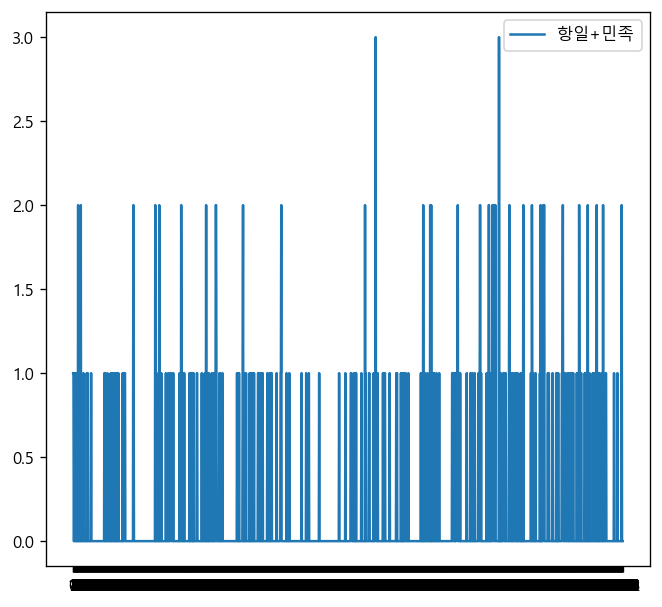

In [16]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['항일+민족']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '항일+민족')
plt.legend()
plt.show()

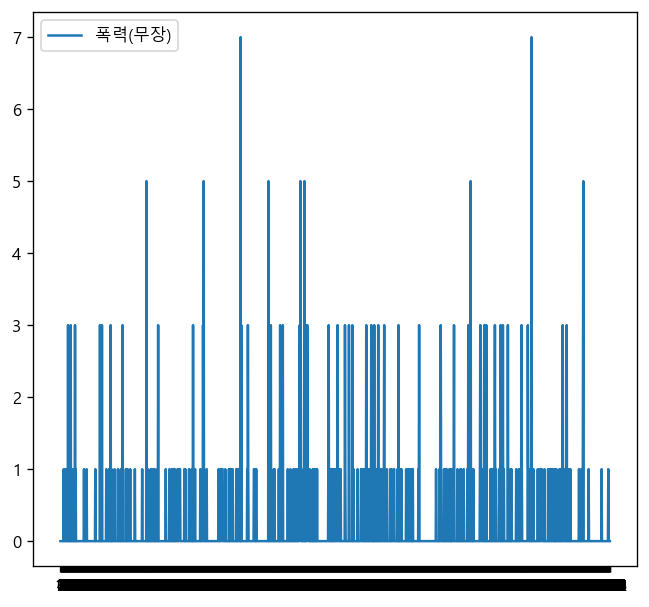

In [17]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['폭력(무장)']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '폭력(무장)')
plt.legend()
plt.show()

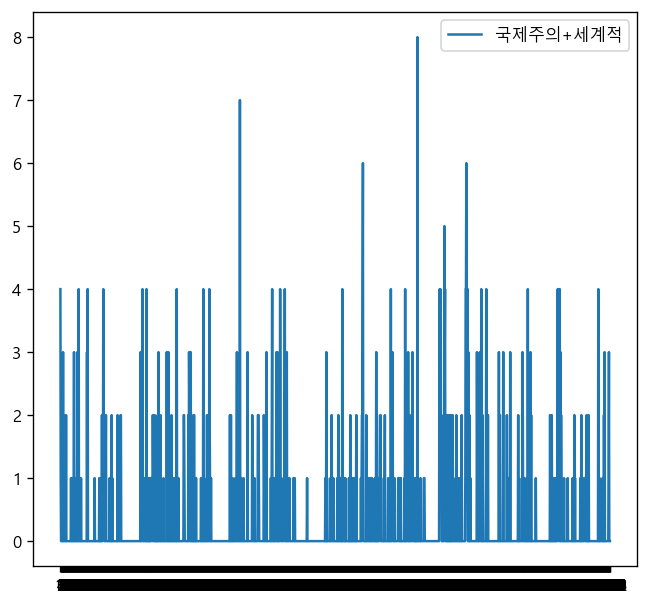

In [18]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['국제주의+세계적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '국제주의+세계적')
plt.legend()
plt.show()

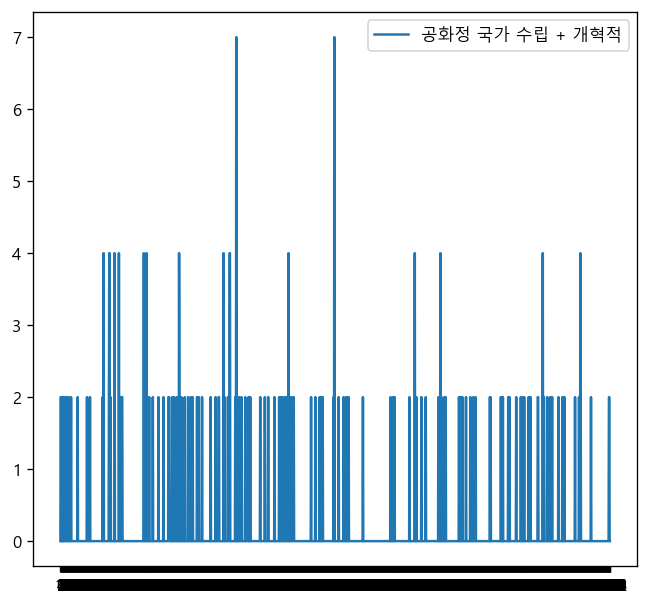

In [19]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['공화정 국가 수립 + 개혁적']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '공화정 국가 수립 + 개혁적')
plt.legend()
plt.show()

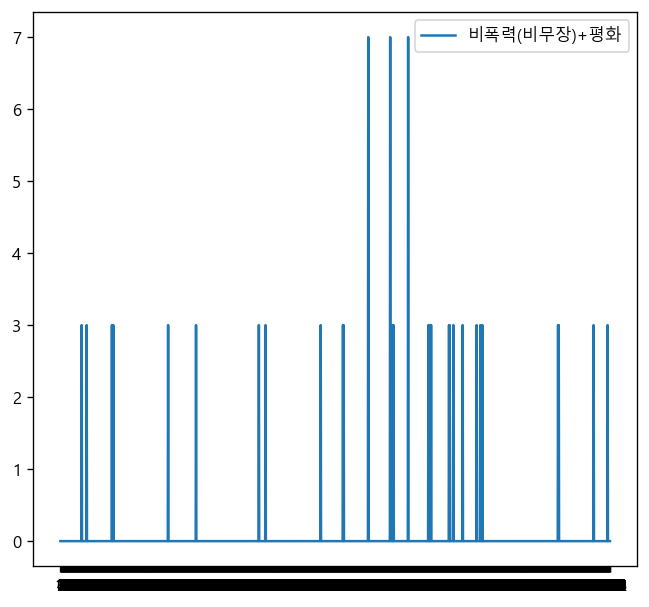

In [20]:
documentIndex = []
for i in range(0,len(reviewPOSList)):
    documentIndex.append(str(i))

targetWords = classWords
class1 = []
for i in range(0,len(documentIndex)):
    class1.append(int(corpus_tfidf_out[str(i)]['비폭력(비무장)+평화']))

#라인 그래프
#그래프로 표현하기
import matplotlib.pyplot as plt

# 배우
plt.plot(documentIndex, class1, label = '비폭력(비무장)+평화')
plt.legend()
plt.show()

<Axes: xlabel='words', ylabel='freq'>

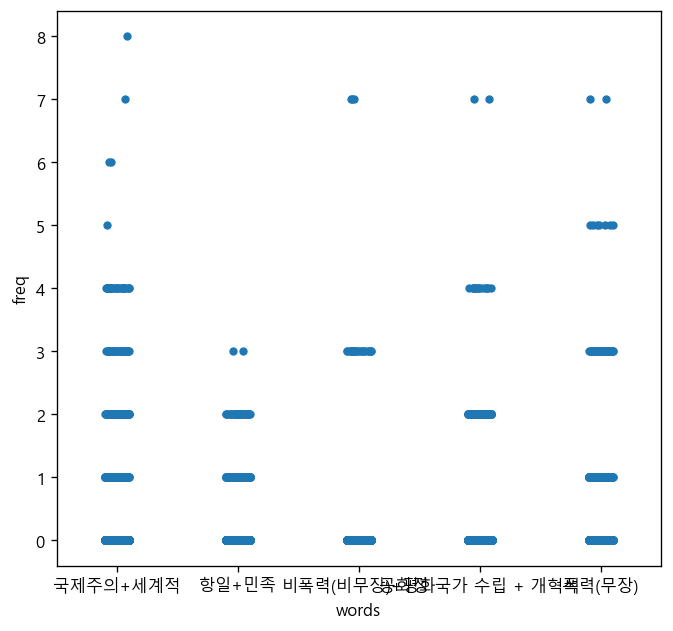

In [21]:
# 스트립 플롯 그리기
def dataRefinedForPlot(matrix, xIndex, listWords):
    import pandas as pd
    freq = []
    words = []
    for eachWord in listWords:
        for i in range(0,len(xIndex)):
            freq.append(int(matrix[str(i)][eachWord]))
            words.append(eachWord)
    refinedDF = pd.DataFrame({'words':words,'freq':freq})
    return refinedDF

inputDF = dataRefinedForPlot(corpus_tfidf_out, documentIndex, targetWords)

#스트립플롯은 데이터를 점으로 찍어 나타낸 그래프이다
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family':'NanumBarunGothic'})
plt.rcParams.update({'font.family':'Malgun Gothic'})
plt.rcParams.update({'figure.dpi':'120'})
plt.rcParams.update({'figure.figsize':[6.5,6]})


sns.stripplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

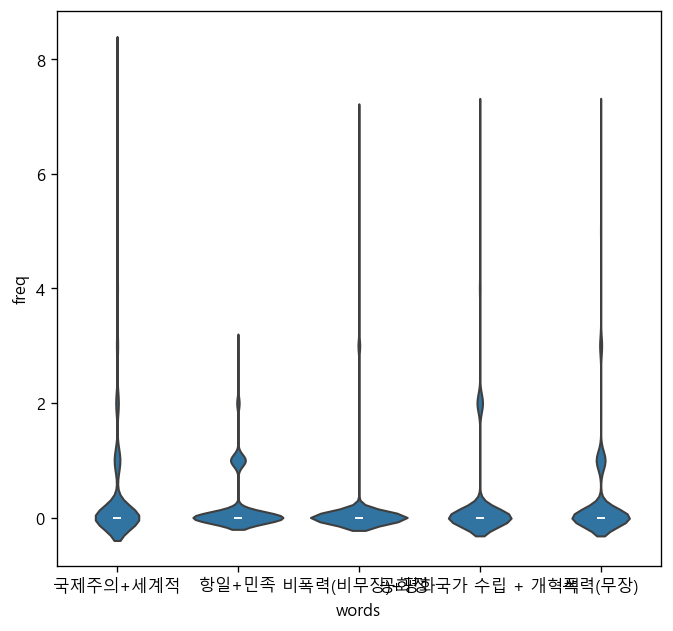

In [22]:
#바이올릿 차트
sns.violinplot(x='words', y='freq', data=inputDF)

<Axes: xlabel='words', ylabel='freq'>

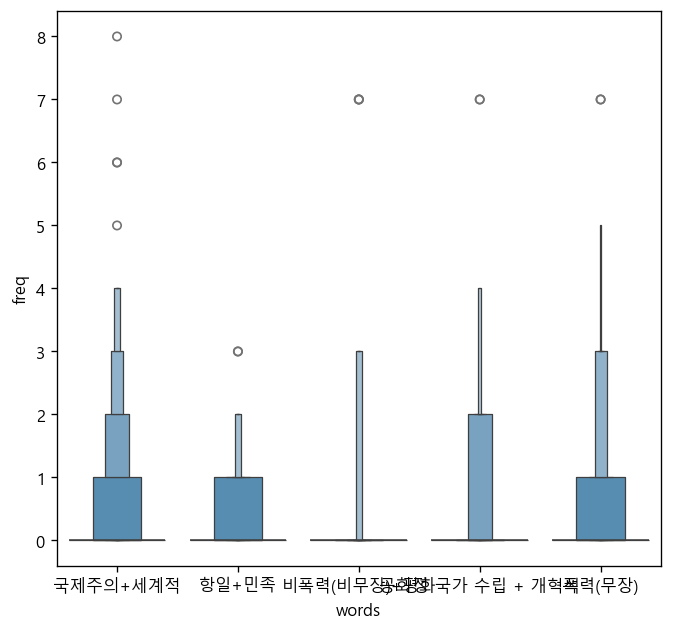

In [23]:
#박슨 플롯
sns.boxenplot(x='words', y='freq', data=inputDF)